<a href="https://colab.research.google.com/github/brianrebollarjuarez1/Ejercicios-Simulacion-I-7MM1/blob/main/Experimento_de_la_Aguja_de_Buffon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experimento de la Aguja de Buffon

Se tienen agujas de longitud k, las cuales son lanzadas hacia varas colocadas en fila con una separacion d entre ellas, ¿Cual es la probabilidad de que una de las agujas lanzadas corte una de las lineas?

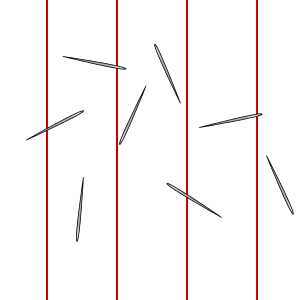

## Solucion Analitica

Consideremos una aguja lanzada y una vara arbitrariamente, tal que $k \leq d$

Sean:

- $x$ la posicion en la que se encuentra la aguja (considerando el centro de esta)
- $\alpha$ el angulo con respecto a la horizontal de la aguja

Consideramos como punto de referencia la vara para la posicion en donde cae la aguja, es decir, si el centro de la aguja cae exactamente sobre la vara, diremos que $x = 0$, y el punto mas lejano que puede caer de la vara es de $x = \frac{d}{2}$, ya que si cae mas lejos, podemos considerar la vara aledaña como punto de referencia, es por eso que:

$0 \leq x \leq \frac{d}{2}$

El angulo es mas simple, la aguja puede caer totalmente horizontal, o totalmente vertical, es decir:

$0 \leq \alpha \leq \frac{\pi}{2}$

Ambas variables siguen una distribucion uniforme, pues el lanzamiento de aguja es una experimento aleatorio, es decir $x \thicksim U(0,\frac{d}{2})$ y $\alpha \thicksim U(0,\frac{\pi}{2})$, cada una tiene su funcion de distribucion, llamemosle $y$, no sabemos como es $y$, pero por ser fdp, sabemos que:

- $y(\frac{d}{2}) = 1$ $→$ $y = \frac{2}{d}$
- $y(\frac{\pi}{2}) = 1$ $\rightarrow$ $y = \frac{2}{\pi}$

De tal manera que la funcion de distribucion conjunta, sera el producto de cada una de las distribuciones:

- $f(x,\alpha) = \frac{4}{\pi d}$ para $0 \leq x \leq \frac{d}{2}$ y $0 \leq \alpha \leq \frac{\pi}{2}$

Pero, ¿Como garantizamos que la aguja caiga en la vara a partir de x?, para ello analizamos la siguiente imagen:

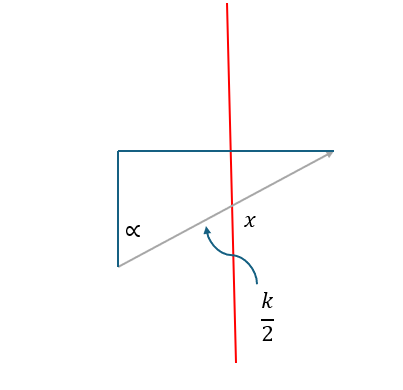

Aqui se puede ver que el cateto opuesto a $\alpha$ se relaciona en cuando corta la aguja a la vara, entonces podemos decir que para que la aguja corte la vara, la distancia que tiene que haber entre el centro de la aguja y la vara, debe ser menor a la medida del cateto opuesto formado, es decir:

- $x \leq \frac{k}{2} sen(\alpha)$

Entonces, la probabilidad que buscamos es:

$P = \int _0 ^{\frac{\pi}{2}} \int _0 ^{\frac{k}{2} sen(\alpha)} \frac{4}{\pi d}$ $dxd\alpha$ = $\frac{4}{\pi d} \int _0 ^{\frac{\pi}{2}} \int _0 ^{\frac{k}{2} sen(\alpha)}$ $dxd\alpha$ = $\frac{2k}{\pi d} \int _0 ^{\frac{\pi}{2}} sen(\alpha) d\alpha$ = $\frac{2k}{\pi d}$

## Solucion por Simulacion

  Importamos librerias.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random as rnd

Planteamos el experimento, de tal manera que siga el pseudocodigo:

- Generar $x \thicksim U(0,\frac{d}{2})$ y $\alpha \thicksim U(0,\frac{\pi}{2})$
- Si $x \leq \frac{k}{2} sen(\alpha)$, Hacer $y_i = \frac{exitos + 1}{i+1}$
- Si no, Hacer $y_i = \frac{exitos}{i+1}$
- Salir $y$

Realizamos el experimento.

In [ ]:
def experimento(N,d,k):
  prob = []
  exitos = 0
  for i in range(N):
    x = rnd.uniform(0,d/2)
    alpha = rnd.uniform(0,np.pi/2)
    if x <= (k/2)*np.sin(alpha):
      exitos += 1
      prob.append(exitos/(i+1))
    else:
      exitos += 0
      prob.append(exitos/(i+1))
  return prob

Realizamos el experimento $1000000$ de veces.

In [25]:
N = 1000000

Ejemplificamos con $k = 10$ y $d = 30$

In [26]:
d = 30
k = 10

Realizando la simulacion y obteniendo la media de la muestra, obtenemos la aproximacion a la solucion.

In [27]:
prob = experimento(N,d,k)

In [28]:
media = np.mean(prob)
media

0.21289244636675128

Comparamos.

In [31]:
(2*k)/(np.pi * d)

0.2122065907891938

Graficando.

In [29]:
desvest = np.std(prob)

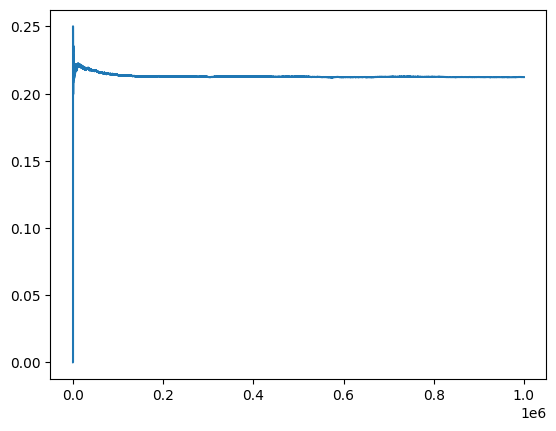

In [30]:
plt.plot(prob)
plt.show()